### Author Name: put your name here

# Homework 1

In this assignment you will get experience with Pandas, NumPy, Scikit-learn, vectorization and linear regression.
You will build a linear regression model using the line of best fit to predict home prices (the target) given the size of the home (feature).

You will first read the housing data into a Pandas dataframe.
You will compute the line of best fit of this data and make home price predictions.
You'll calculate the root mean squared error of your predictions and then compare your results to scikit-learn's linear regression model.

Make sure to read each cell for instructions. You will need to write code in all cells with a YOUR CODE  HERE comment. 

You'll use NumPy vectorization for all of your computations. See https://www.programiz.com/python-programming/numpy/vectorization for help. 

In [4]:
# import NumPy, Pandas and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# TASK: Read home_price_data.csv into a Pandas dataframe called, df, and use the Pandas head method to display the first five rows of data

df = pd.read_csv("home_price_data.csv")
df.head(5)


,size,price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


In [6]:
# TASK: Use Pandas to learn more about your dataset
# use the info() function to learn about the dataset's data types eg. df.info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   size    47 non-null     int64
 1   price   47 non-null     int64
dtypes: int64(2)
memory usage: 884.0 bytes


In [7]:
# TASK: # Use the describe() function to get statistics like the min, max, mean etc. of each variable in the dataframe

df.describe()

,size,price
count,47.000000,47.000000
mean,2000.680851,340412.659574
std,794.702354,125039.899586
min,852.000000,169900.000000
25%,1432.000000,249900.000000
50%,1888.000000,299900.000000
75%,2269.000000,384450.000000
max,4478.000000,699900.000000


In [8]:
# TASK: Check for missing values in each column using isnull().sum()

df.isnull().sum()

size     0
price    0
dtype: int64

In [9]:
# TASK: Check for duplicate rows in the dataset using duplicated().sum()

df.duplicated().sum()

np.int64(0)

## Convert the dataframe to a NumPy array

Pandas is nice to read in data and store in a dataframe that looks like an excel spreadsheet. Let's covert the dataframe to numpy arrays we can work with.

Store the entire dataset in a numpy array called data -> data=df.values

Store the feature in a numpy array X - (check the dataframe. What column is size in? Use slicing to store that one column in a variable called, X) 
Store the price, our label, in a numpy array Y - (do the same for Y)

Print the first 5 rows of data, X and Y

In [10]:
# TASK
# Store the entire dataset in a numpy array called data
# Store the size feature in a numpy array X
# Store the price feature, our label, in a numpy array Y
# Print data, X and Y

data = np.array(df.values)
X = df['size'].to_numpy()
Y = df['price'].to_numpy()

print(data[:5])
print(X[:5])
print(Y[:5])
 

[[  2104 399900]
 [  1600 329900]
 [  2400 369000]
 [  1416 232000]
 [  3000 539900]]
[2104 1600 2400 1416 3000]
[399900 329900 369000 232000 539900]


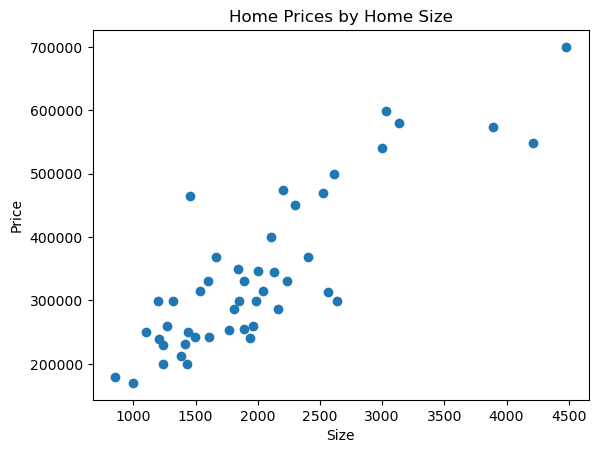

In [12]:
# This code will plot the data, X and Y using a scatter plot
# Make sure you stored the size in X and the price in Y

plt.scatter(X,Y)
plt.title('Home Prices by Home Size')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

## Linear Regression Using NumPy Vectorization

The plot shows a linear relationship between size and price. A linear regression model looks like a good choice to model home prices. Let's use the line of best fit to create the model. We'll compute the line of best fit using vectorization. 

NumPy vectorization involves performing mathematical operations on entire arrays, eliminating the need to loop through individual elements. For more information see, https://www.programiz.com/python-programming/numpy/vectorization

Let's practice it first using the numpy array created for you in the code cell below.

In [13]:
arr=np.array([8,2,11,6,5,4,12,9,6,1])

In [14]:
# TASK
# Use vectorization to create a new array called, newarr, with 5 added to each element of the array above. 
# The new array should have the following values:
# [13,7,16,11,10,9,17,14,11,6]
# print the new numpy array to confirm it is correct
# Remember, don't use any loops for this.

newarr = arr + 5
print(newarr)

[13  7 16 11 10  9 17 14 11  6]


# Normalization

Next, let's continue to practice vectorization and normalize the data in arr.

The goal of normalization is to transform features to be on a similar scale. This improves the performance and training stability of a machine learnin model. We'll learn more about this throughout the semester. 

Using the original array, arr, create a new array with normalized data. Use this formula.

Use this formula
![NORMALIZE](normalize.png) 


In [15]:
# TASK
# create a new array called, normalized
# the result should be [0.63636364, 0.09090909, 0.90909091, 0.45454545, 0.36363636, 0.27272727, 1., 0.72727273, 0.45454545, 0.])
# Remember, don't use any loops for this.

normalized = ((arr - np.min(arr))/(np.max(arr) - np.min(arr)))
print(normalized)

[0.63636364 0.09090909 0.90909091 0.45454545 0.36363636 0.27272727
 1.         0.72727273 0.45454545 0.        ]


## Line of Best Fit

Now we're ready to compute the line of best fit using vectorization. 

Use the least squares method to compute the line of best fit: y = mx + b

We will use this function to predict home prices given the size of a home.

For more information on the line of best fit see, https://www.varsitytutors.com/hotmath/hotmath_help/topics/line-of-best-fit


#### Use the following formula to compute the slope
Use NumPy vecotrization, do not use loops.

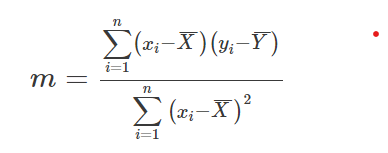

In [16]:
# TASK
# Let's do this step by step.
# First calculate the mean of X and the mean of Y. You can use vectorization or NumPy has a function mean you can use.
# Eg. mean_x = np.mean(X)

mean_x = np.mean(X)
mean_y = np.mean(Y)

print(mean_x, mean_y)

2000.6808510638298 340412.6595744681


In [17]:
# TASK
# Now compute the sum of the vector X minus the mean of X
# Then the sum of the vector Y minus the mean of Y
# Then use those values to compute m

mwx = np.sum(X) - mean_x
mwy = np.sum(Y) - mean_y

num = mwx * mwy
den = np.sum(mwx ** 2)

m = num/den

print(num, den)
print(m)

1441116801319.2576 8469763704.2933445
170.14840692530206


#### Calculate the y intercept
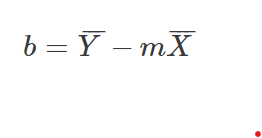

In [18]:
# TASK
# YOUR CODE GOES HERE
b = mean_y - (m * mean_x)

print(b)

-5.820766091346741e-11


# Make Predictions

You have the slope, m and the y intercept, b. This is what you need for the line of best fit, y = mx + b. 

Now use your line of best fit to make predictions. Create a new array called Y_pred and use the function y = mX + b to create predictions using the training set X. Again use vectorization, no loops. 

In [19]:
# TASK
Y_pred = (m * X) + b

Text(0.5, 0, 'Population of City in 10,000s')

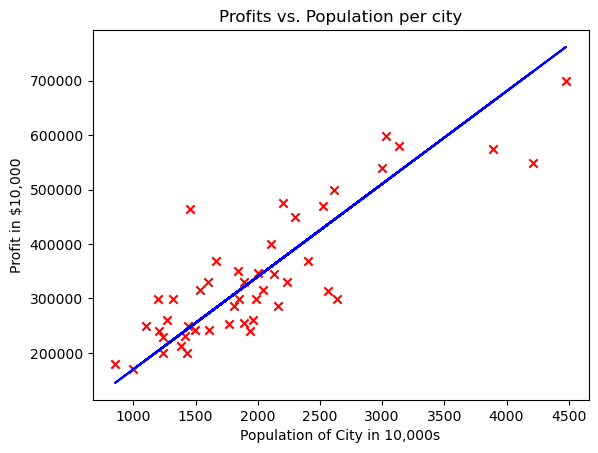

In [20]:
# Plot the linear fit
# Run this code to see your line of best fit
# Make sure your predictions are in Y_pred
plt.plot(X, Y_pred, c = "b")

# # Create a scatter plot of the data. 
plt.scatter(X, Y, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

# Root Mean Square Error

Let's see how well your model did by calculating the root mean square error of the predictions. Create a python function called, root_mean_squared_error, that calculates the root mean squared error of your model.

![RMSE](rmse.png) 

In [21]:
# TASK
# Get the RMSE of your line 

import math

def root_mean_squared_error(y, yhat):
    y = np.array(y)
    yhat = np.array(yhat)
    diffs = y - yhat
    squared_diffs = diffs ** 2
    mean_squared_error = np.mean(squared_diffs)
    rmse = np.sqrt(mean_squared_error)

    return rmse

In [22]:
# Let's test out your function
root_mean_squared_error(Y, Y_pred)

np.float64(70004.69232631693)

# Scikit-Learn Linear Regression Model

The popular Python machine learning package, scikit-learn, has a linear regression model. Let's compare your line of best fit to scikit-learn's linear regression model.

In [23]:
# Read and run this code

# step1: import the library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# step2: creat a LinearRegression object
lin_reg = LinearRegression()

# You must first reshape X to a X.size by 1 array.
# Scikit-learn's models expect each sample and output to be in it's own array
# For example, the array X with sizes [2104,1600,...] needs to look like [[2104],[1600],...]
# And the array Y with the labels needs to be stored as [[399900][329900]...]
# This code will reshape the array, X, to an array with size (number of rows in X x 1col)
X=X.reshape(X.size, 1)
Y=Y.reshape(Y.size, 1)

# the fit function uses X and Y to create the linear regression model
lin_reg.fit(X, Y) 

# step3: check the intercept_ and coef_
# Are they the same or close to your line of best fit (they should be)?
print(lin_reg.intercept_, b) 
print(lin_reg.coef_, m)

[71270.49244873] -5.820766091346741e-11
[[134.52528772]] 170.14840692530206


In [24]:
# Now use the predict method to make predictions using linear regression.
y_pred = lin_reg.predict(X)

In [25]:
# Use your root mean squared error function you created above to calculate this model's rmse
root_mean_squared_error(Y, y_pred)

np.float64(64158.128720109074)

# Summary

In [ ]:
# In you own words answer the following questions. 
# step 1: create a new markdown cell
# step 2: answer the following
# - Imagine you are presenting this dataset to a team. Which three insights would you highlight and why?
# You insights could be about data cleaning/exploration, data vizualization, data normalization,
# linear regression, predictions or anything else you find interesting.

I would highlight that the data itself was already clean and ready to work with, since we were able to easily explore the dataset without any preprocessing. I would also highlight that based on the data, there is a strong linear relationship between home size and price, so bigger homes cost more. Finally, I would highlight that the data can be easily be visualized in any way that it needs to be; it's very cooperative with numpy's functions.

# You're finished. Congratulations!